#### 1. Load the Tweets.csv file and print the first 10 samples.
Using pandas to open the csv file and print the first 10 samples.

In [2]:
import pandas as pd

df = pd.read_csv('Tweets.csv')
print(df.head(10))

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   
5  570300767074181121          negative                        1.0000   
6  570300616901320704          positive                        0.6745   
7  570300248553349120           neutral                        0.6340   
8  570299953286942721          positive                        0.6559   
9  570295459631263746          positive                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2      

#### 2. Show which column will be used as input for the classification. (Hint: Show a few examples from the column)

The classification input column is 'text' and here we print the first 10 rows of that column.

In [3]:
print((df['text']).head(10))

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object


#### 3. Show which column will be used as output for the classification. (Hint: Show a few examples from the column)

The classification output column is 'airline_sentiment' and here we print the first 10 rows of that column.

In [4]:
print((df['airline_sentiment']).head(10))

0     neutral
1    positive
2     neutral
3    negative
4    negative
5    negative
6    positive
7     neutral
8    positive
9    positive
Name: airline_sentiment, dtype: object


#### 4. Transform the values of the output columns from categorical to numerical ones.

We do this using an encoder and adding a new column with the encoded 'airline_sentiment' to the dataframe.

In [5]:
df['airline_sentiment_code'] = pd.factorize(df['airline_sentiment'])[0]
print(df)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

#### 5. Perform an exploratory data analysis on the data and create at least five plots of your choice.

- First we look at how many sentiments per airline we have.
- Secondly we want to determine through a pie chart how many sentiments are negative, neutral, and positive.
- Third graph looks at the proportional sentiment of each airline in a pie chart. The results are that all airlines have more negative reviews than any other sentiment.
- The fourth graph looks at the reasons for negative feedback and counts the occurences from the dataset.
- Lastly we segment those reasons like in the third graph to apply them to each individual airline.

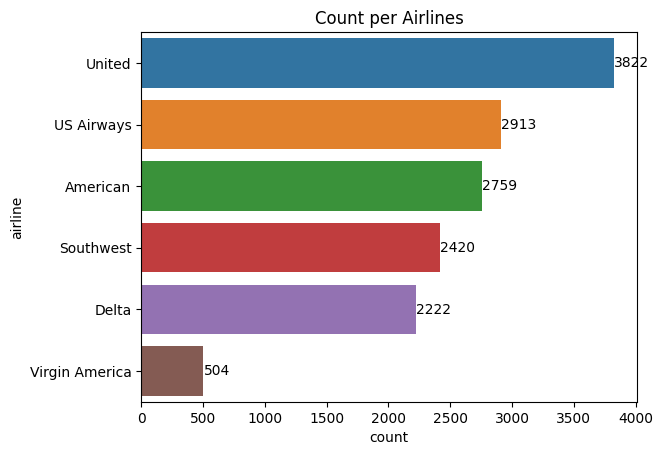

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data = df, y = 'airline',
                   order = df.airline.value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title('Count per Airlines',)
                                    
plt.show()

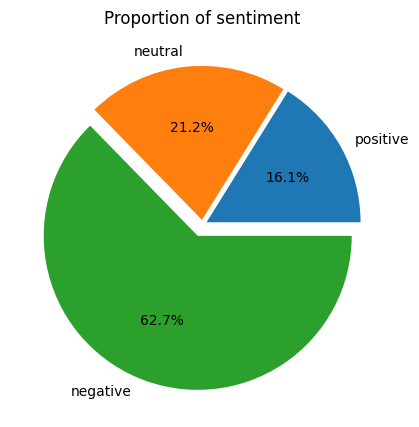

In [7]:
x = df.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')

plt.show()

In [8]:
sentiment = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment_code'].count().unstack()
# a['total'] =  [a.values[x].sum() for x in range(0,6)]
sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


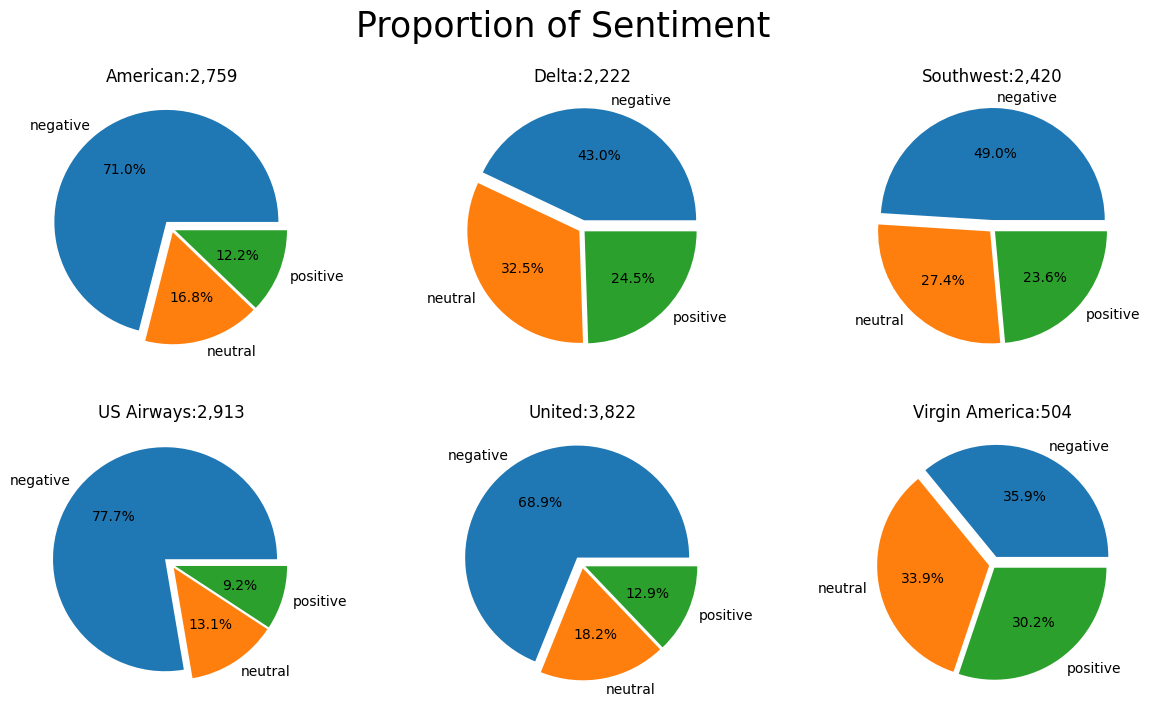

In [9]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = sentiment.iloc[i]    
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{sentiment.index[i]}:{format(sentiment.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)    
plt.show()


In [10]:
print(df.negativereason.unique())

[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


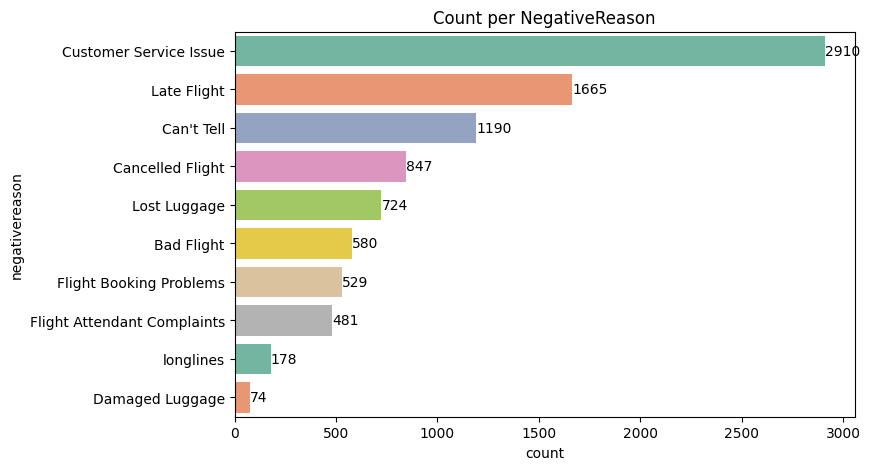

In [11]:
# negative sentiment only has the value of 'negativereason'
df_neg = df[df.airline_sentiment == 'negative']

plt.figure(figsize=(8,5))
ax = sns.countplot(data = df_neg, y = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

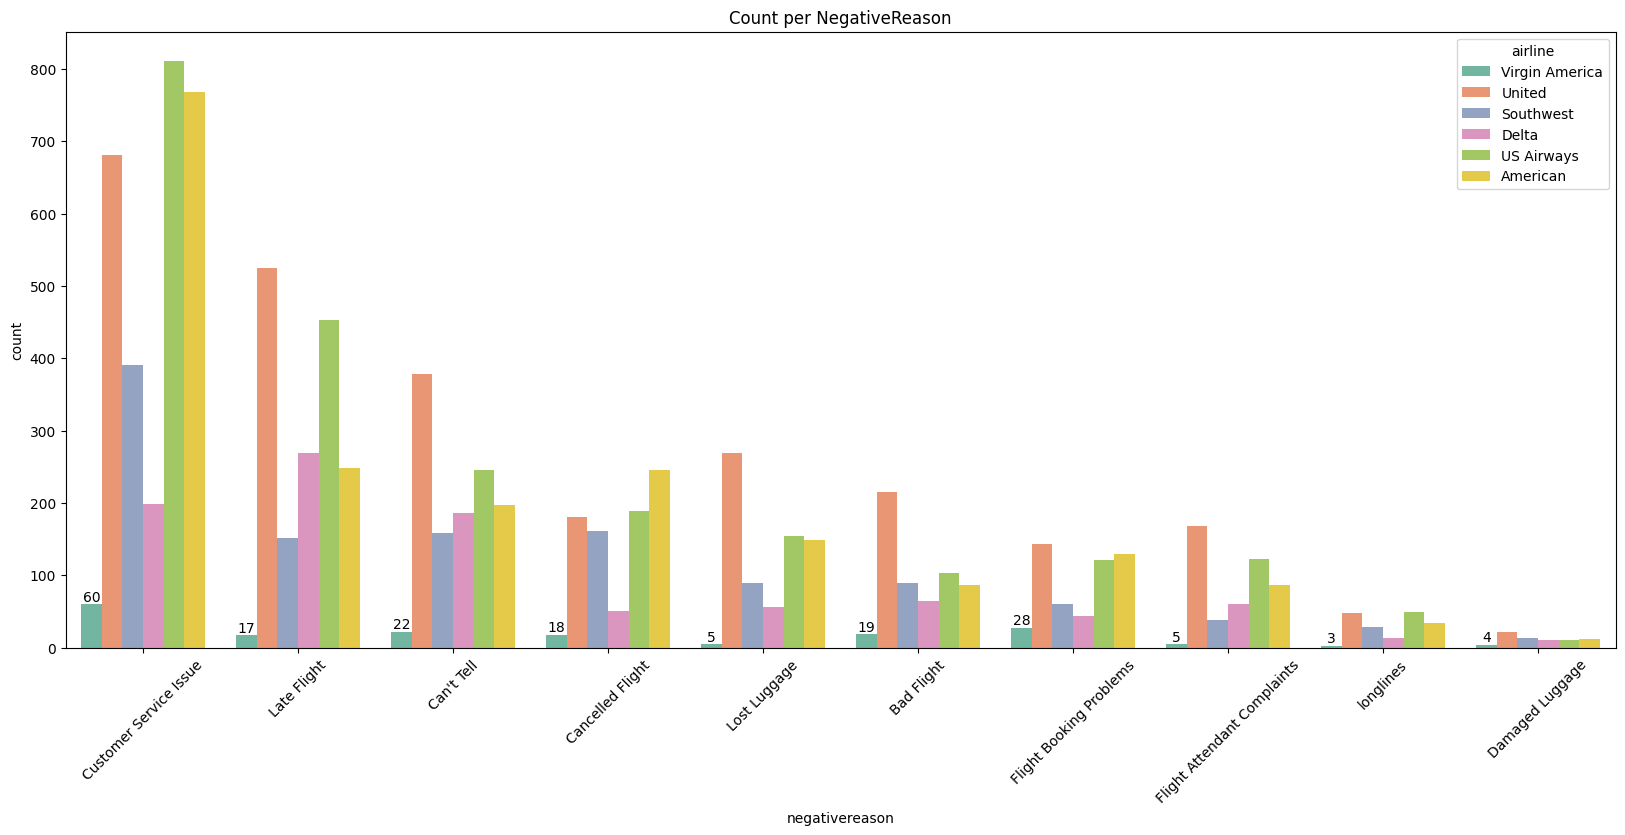

In [12]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df_neg, x = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index, hue = 'airline')

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')
plt.xticks(rotation=45)
plt.show()

#### 6. Split the data into a training and a test set.

In [13]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['airline_sentiment_code']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### 7. Vectorize the training and test sets.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training set
X_train_vec = vectorizer.fit_transform(X_train)
# y_train_vec = vectorizer.fit_transform(y_train)

# Transform the test set
X_test_vec = vectorizer.transform(X_test)
# y_test_vec = vectorizer.transform(y_test)

#### 8. Create a Decision Tree classifier and train it with the training data.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the classifier using the training set
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)

#### 9. Calculate the accuracy of the classifier using the test data.
#### 10. Calculate the F-score of the classifier using the test data.

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Calculate the accuracy and f-score of the classifier using the test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)

Accuracy: 0.6905737704918032
F1 score: 0.6880194276209283


#### 11. Repeat steps 8 and 9 by changing the hyperparameters of the classifier. 

In [31]:
# Create Decision Tree classifier object with new hyperparameters
clfh1 = DecisionTreeClassifier(max_depth=10, min_samples_split=5)

# Train the classifier using the training set
clfh1.fit(X_train_vec, y_train)

# Predict the labels of the test set
y_predh1 = clfh1.predict(X_test_vec)

# Calculate the accuracy and F1 score of the classifier using the test set
accuracy = accuracy_score(y_test, y_predh1)
f1 = f1_score(y_test, y_predh1, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)

Accuracy: 0.7076502732240437
F1 score: 0.652994851527911


In [18]:
# Create Decision Tree classifier object with new hyperparameters
clfh2 = DecisionTreeClassifier(splitter='random', max_depth=10, min_samples_split=5)

# Train the classifier using the training set
clfh2.fit(X_train_vec, y_train)

# Predict the labels of the test set
y_pred = clfh2.predict(X_test_vec)

# Calculate the accuracy and F1 score of the classifier using the test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)

Accuracy: 0.7030965391621129
F1 score: 0.6512331833844958


In [19]:
# Create Decision Tree classifier object with new hyperparameters
clfh3 = DecisionTreeClassifier(max_depth=20, min_samples_split=5)

# Train the classifier using the training set
clfh3.fit(X_train_vec, y_train)

# Predict the labels of the test set
y_pred = clfh3.predict(X_test_vec)

# Calculate the accuracy and F1 score of the classifier using the test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)

Accuracy: 0.7099271402550091
F1 score: 0.7005608672785628


For the first of the three different decision trees I used basic hyperparameters to slightly increase the scorings used. This was achieved. Next I used the random splitter criterion believing it would reduce both scores but to my suprise only reducing them by a small percentage. Finally I used a much larger max_depth criterion. This increased accuracy by a bit and f-score by a lot but it may induce overfitting.

#### 12. Repeat steps 8 and 10 using the Support Vector Machines classifier

In [32]:
from sklearn.svm import SVC

# Create SVM classifier object
clfSVC = SVC()

# Train the classifier using the training set
clfSVC.fit(X_train_vec, y_train)

# Predict the labels of the test set
y_predSVC = clfSVC.predict(X_test_vec)

# Calculate the F1 score of the classifier using the test set
f1 = f1_score(y_test, y_predSVC, average='weighted')

print("F1 score:", f1)

F1 score: 0.7914521629613943


#### 13. Create the ROC curves of the two classifiers together.

In [36]:
from sklearn import metrics

# Create and plot the ROC curves.
nb_disp = metrics.roc_curve(y_pred, X_test_vec.toarray(), y_test)
svm_disp = metrics.roc_curve(y_predSVC, X_test_vec.toarray(), y_test, ax=nb_disp.ax_)
svm_disp.figure_.suptitle("ROC curve comparison")

TypeError: roc_curve() takes 2 positional arguments but 3 were given

#### 14. Elaborate on which of the models you select at the end.